In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn import svm

%matplotlib inline

def getParameters(dataframe, model,param_grid):  
    X = dataframe.iloc[:,:36].values
    Y = dataframe.iloc[:,36].values 
    grid = GridSearchCV(model, param_grid, cv=10,  return_train_score=True) 
    # fitting the model for grid search 
    grid.fit(X, Y) 
    # print best parameter after tuning 
    print("The best parameters:")
    print(grid.best_params_) 
    print(grid.best_score_)
    data= pandas.DataFrame(grid.cv_results_)
    Plot_graph(data)
    
def Plot_graph(df):
    #plt.rcParams["font.weight"] = "bold"
    #plt.rcParams["axes.labelweight"] = "bold"
    #label = ['0.001', '0.002', '0.003', '0.004', '0.005']
    plt.figure(figsize=(7, 3))
    plt.plot(df["param_C"],df["mean_train_score"], label="Training Score")
    plt.plot(df["param_C"],df["mean_test_score"], label="Cross-validation Score", linestyle='dotted')
    plt.title("GridSearchCV results for optimal parameter\n ", fontsize=14)
    plt.xlabel("Learning Parameter", fontsize=14)
    plt.ylabel("Score", fontsize=14)
    plt.locator_params(axis='y', nbins=5)
    plt.locator_params(axis='x', nbins=5)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc="best")
    plt.grid(True)   

In [2]:
import warnings
warnings.filterwarnings("ignore")

# EXPERIEMENT USING SUPPORT VECTOR MACHINE

# Optimal Parameter Searching

In [3]:
#user1= pandas.read_csv('../FedAnalysis/Client1/TrainData.csv')
#user2= pandas.read_csv('../FedAnalysis/Client2/TrainData.csv')
#user3= pandas.read_csv('../FedAnalysis/Client3/TrainData.csv')
#user4= pandas.read_csv('../FedAnalysis/Client4/TrainData.csv')
#user5= pandas.read_csv('../FedAnalysis/Client5/TrainData.csv')
#user6= pandas.read_csv('../FedAnalysis/Client6/TrainData.csv')
#user7= pandas.read_csv('../FedAnalysis/Client7/TrainData.csv')
#user8= pandas.read_csv('../FedAnalysis/Client8/TrainData.csv')

user1= pandas.read_csv('../FedAnalysis2/Data/Client1.csv')
user2= pandas.read_csv('../FedAnalysis2/Data/Client2.csv')
user3= pandas.read_csv('../FedAnalysis2/Data/Client3.csv')
user4= pandas.read_csv('../FedAnalysis2/Data/Client4.csv')

user5= pandas.read_csv('../FedAnalysis2/Data/Client5.csv')
user6= pandas.read_csv('../FedAnalysis2/Data/Client6.csv')
user7= pandas.read_csv('../FedAnalysis2/Data/Client7.csv')

#user5= pandas.read_csv('../FedAnalysis/Group5/TrainData1.csv')
#user6= pandas.read_csv('../FedAnalysis/Group6/TrainData2.csv')


#svm_estimator = svm.SVC(kernel='poly', class_weight='balanced')
svm_estimator = svm.SVC(kernel='linear', class_weight='balanced')
#svm_estimator = svm.SVC()
param_grid = {'C': [0.001, 0.002,0.003, 0.004, 0.005],  
  #            'gamma': ['scale'], 
              'kernel': [ 'linear']}  

#param_grid = {'C': range(1,10),  
              #'gamma': ['scale'], 
 #             'kernel': [ 'linear']} 

The best parameters:
{'C': 0.001, 'kernel': 'linear'}
0.9432624113475178


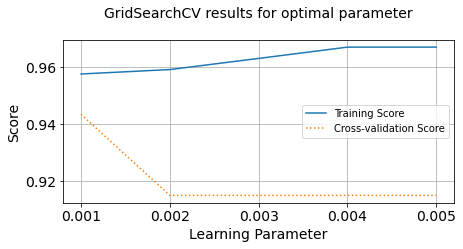

In [4]:
getParameters(user1,svm_estimator,param_grid)

The best parameters:
{'C': 0.003, 'kernel': 'linear'}
0.9393939393939394


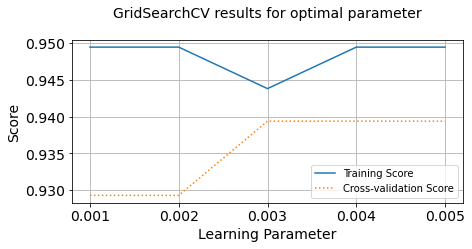

In [5]:
getParameters(user2,svm_estimator,param_grid)

The best parameters:
{'C': 0.001, 'kernel': 'linear'}
0.9845360824742269


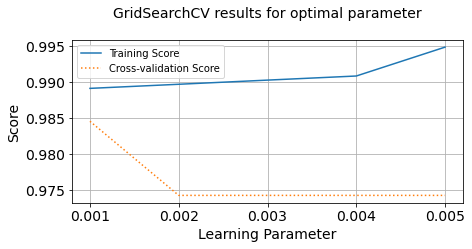

In [6]:
getParameters(user3, svm_estimator,param_grid)

The best parameters:
{'C': 0.003, 'kernel': 'linear'}
0.9161290322580645


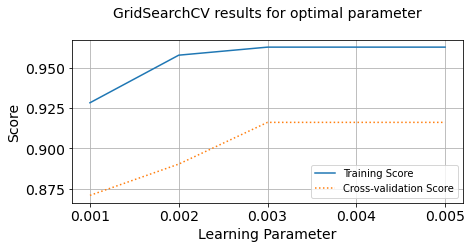

In [7]:
getParameters(user4, svm_estimator,param_grid)

The best parameters:
{'C': 0.001, 'kernel': 'linear'}
0.8769230769230769


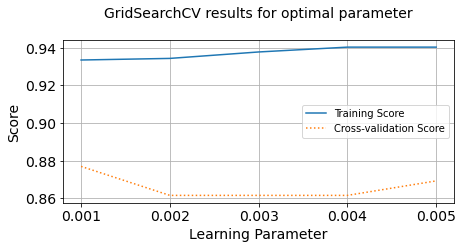

In [8]:
getParameters(user5, svm_estimator,param_grid)

The best parameters:
{'C': 0.005, 'kernel': 'linear'}
0.40384615384615385


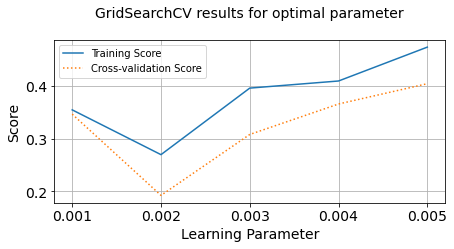

In [9]:
getParameters(user6, svm_estimator,param_grid)

The best parameters:
{'C': 0.005, 'kernel': 'linear'}
0.6176470588235294


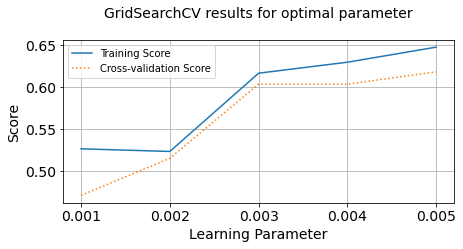

In [10]:
getParameters(user7, svm_estimator,param_grid)

In [11]:
#getParameters(user8, svm_estimator,param_grid)

# Federated Approach

In [12]:
from sklearn.metrics import accuracy_score
#train= pandas.read_csv('../FedAnalysis2/GlobalTrain.csv')
train= pandas.read_csv('../FedAnalysis2/Client1.csv')
test= pandas.read_csv('../FedAnalysis2/Data/TestDataset.csv')
#Train Dataset
X_train = train.iloc[:,:36].values
Y_train = train.iloc[:,36].values
#Test Dataset
X_test = test.iloc[:,:36].values
Y_test = test.iloc[:,36].values
#Train model
#model = svm.SVC(kernel='linear', C=1.0, class_weight='balanced')
model = svm.SVC(kernel='linear', C=0.003)
#model = svm.SVC(kernel='rbf', C=5.0, gamma='scale' )
mm= model.fit(X_train,Y_train )
# make predictions
y_pred = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(Y_test, y_pred)
print('Accuracy: %.2f' % acc)
print(mm)

Accuracy: 0.76
SVC(C=0.003, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


# EXPERIEMENT WITH LOGISTIC REGRESSION

In [13]:
from sklearn.linear_model import LogisticRegression
logic_estimator = LogisticRegression(random_state=0, class_weight='balanced')

param_grid2 = {'C': [0.001, 0.002,0.003, 0.004, 0.005]  } 
#param_grid2 = {'C': range(1,10)  } 
#param_grid2 = {'C': np.arange(0.001,1, 0.1)  } 

# Optimal Parameter Searching

The best parameters:
{'C': 0.001}
0.9432624113475178


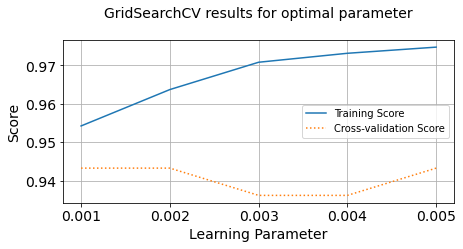

In [14]:
getParameters(user1,logic_estimator,param_grid2)

The best parameters:
{'C': 0.005}
0.9191919191919192


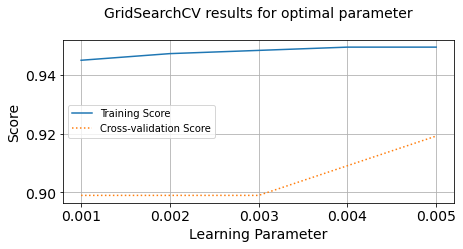

In [15]:
getParameters(user2,logic_estimator,param_grid2)

The best parameters:
{'C': 0.001}
0.9742268041237113


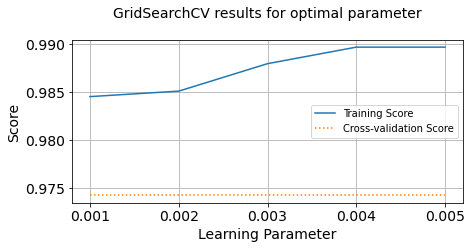

In [16]:
getParameters(user3,logic_estimator,param_grid2)

The best parameters:
{'C': 0.004}
0.8903225806451613


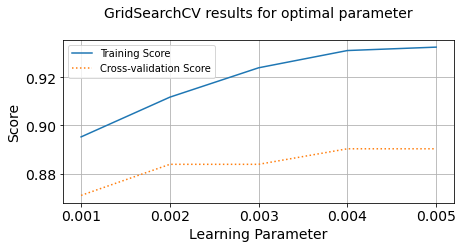

In [17]:
getParameters(user4,logic_estimator,param_grid2)

The best parameters:
{'C': 0.003}
0.8923076923076924


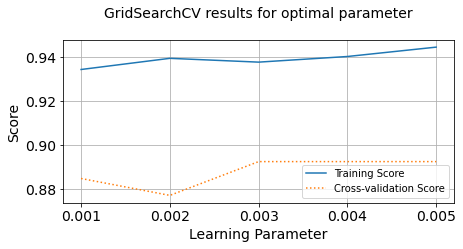

In [18]:
getParameters(user5,logic_estimator,param_grid2)

The best parameters:
{'C': 0.003}
0.7115384615384616


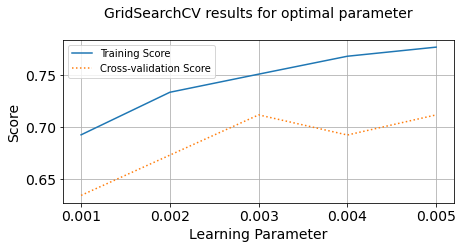

In [19]:
getParameters(user6,logic_estimator,param_grid2)

The best parameters:
{'C': 0.005}
0.75


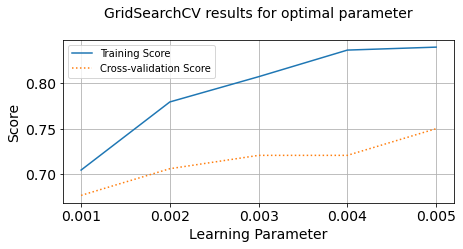

In [20]:
getParameters(user7,logic_estimator,param_grid2)

In [21]:
#getParameters(user8,logic_estimator,param_grid2)

# Federated Approach

In [22]:
from sklearn.metrics import accuracy_score
train= pandas.read_csv('../FedAnalysis2/Client1.csv')
#train= pandas.read_csv('../FedAnalysis2/GlobalTrain.csv')
test= pandas.read_csv('../FedAnalysis2/Data/TestDataset.csv')
#Train Dataset
X_train = train.iloc[:,:36].values
Y_train = train.iloc[:,36].values
#Test Dataset
X_test = test.iloc[:,:36].values
Y_test = test.iloc[:,36].values
#Train model
model = LogisticRegression( C=0.003, random_state=0)
ml =model.fit(X_train,Y_train )
# make predictions
y_pred = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(Y_test, y_pred)
print('Accuracy: %.2f' % acc)
print(ml)

Accuracy: 0.80
LogisticRegression(C=0.003, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [23]:
from sklearn.metrics import accuracy_score
train= pandas.read_csv('../FedAnalysis2/TrainData1.csv')
test= pandas.read_csv('../FedAnalysis2/Data/TestDataset.csv')
#Train Dataset
X_train = train.iloc[:,:36].values
Y_train = train.iloc[:,36].values
#Test Dataset
X_test = test.iloc[:,:36].values
Y_test = test.iloc[:,36].values
#Train model
model = LogisticRegression( random_state=0, class_weight='balanced')
ml =model.fit(X_train,Y_train )
# make predictions
y_pred = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(Y_test, y_pred)
print('Accuracy: %.2f' % acc)
print(ml)

IndexError: single positional indexer is out-of-bounds

In [ ]:
def getParameters2(dataframe, model,param_grid):  
    X = dataframe.iloc[:,:36].values
    Y = dataframe.iloc[:,36].values 
    grid = GridSearchCV(model, param_grid, cv=10,  return_train_score=True) 
    # fitting the model for grid search 
    grid.fit(X, Y) 
    # print best parameter after tuning 
    print("The best parameters:")
    print(grid.best_params_) 
    print(grid.best_score_)
    data= pandas.DataFrame(grid.cv_results_)
    Plot_graph2(data)
    
def Plot_graph2(df):
    #plt.rcParams["font.weight"] = "bold"
    #plt.rcParams["axes.labelweight"] = "bold"
    plt.figure(figsize=(6, 3))
    plt.plot(df["param_alpha"],df["mean_train_score"], label="Training Score")
    plt.plot(df["param_alpha"],df["mean_test_score"], label="Cross-validation Score")
    plt.title("GridSearchCV results for optimal parameter\n ")
    plt.xlabel("Learning Parameter")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.grid(True)   

In [ ]:
param_grid3 = {'alpha': range(1,5)  } 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

MLP_estimator = MLPClassifier()


In [ ]:
getParameters2(user1,MLP_estimator,param_grid3)

In [ ]:
getParameters2(user2,MLP_estimator,param_grid3)

In [ ]:
getParameters2(user3,MLP_estimator,param_grid3)

In [ ]:
getParameters2(user4,MLP_estimator,param_grid3)

In [ ]:
getParameters2(user5,MLP_estimator,param_grid3)

In [ ]:
getParameters2(user6,MLP_estimator,param_grid3)

In [ ]:
getParameters2(user7,MLP_estimator,param_grid3)

In [ ]:

train= pandas.read_csv('../FedAnalysis2/GlobalTrain.csv')
#train= pandas.read_csv('../FedAnalysis2/TrainData1.csv')
test= pandas.read_csv('../FedAnalysis2/Data/TestDataset.csv')
#Train Dataset
X_train = train.iloc[:,:36].values
Y_train = train.iloc[:,36].values
#Test Dataset
X_test = test.iloc[:,:36].values
Y_test = test.iloc[:,36].values
#Train model
model = MLPClassifier(alpha=2.0,verbose=True, max_iter=250)
ml =model.fit(X_train,Y_train )
# make predictions
y_pred = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(Y_test, y_pred)
print('Accuracy: %.2f' % acc)
print(ml)


In [ ]:
client1= pandas.read_csv('../FedAnalysis2/Raw_data/client1.csv')
client2= pandas.read_csv('../FedAnalysis2/Raw_data/client2.csv')
client3= pandas.read_csv('../FedAnalysis2/Raw_data/client3.csv')
client4= pandas.read_csv('../FedAnalysis2/Raw_data/client4.csv')

client5= pandas.read_csv('../FedAnalysis2/Raw_data/client5.csv')
client6= pandas.read_csv('../FedAnalysis2/Raw_data/client6.csv')
client7= pandas.read_csv('../FedAnalysis2/Raw_data/client7.csv')

TestData= pandas.read_csv('../FedAnalysis2/Raw_data/TestDataset.csv')



In [ ]:
class DataDescribe:
      def combine(self):
            return TestData.head(5)
    
      def dataCount(self):
            return TestData['Activity'].value_counts() 
       
      def plotData(self):
            Plotdata =TestData['Activity'].value_counts()
            return Plotdata.plot(kind='bar', title='Number of observations by activity type')

In [ ]:
describe = DataDescribe()

In [ ]:
describe.dataCount()

In [ ]:
describe.plotData()